In [1]:
run_once = True

In [3]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import pipeline
import matplotlib.pyplot as plt
import requests
from PIL import Image

from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

if run_once == True:
    # Initialize the pipelines
    generator = pipeline('text-generation', model='gpt2-xl')
    classifier = pipeline('zero-shot-classification', model='roberta-large-mnli')
    object_detector = pipeline('object-detection')
    model_id = "stabilityai/stable-diffusion-2-1-base"
    scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
    pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
    pipe = pipe.to("cuda")
    run_once = False



def make_img(prompt):
    image = pipe(prompt).images[0]
    return image

# Function to perform object detection and return the labels
def detect_objects(image):
    # Pass the image directly to the object detector
    bboxes = object_detector(image)
    # Extract the labels of the detected objects
    labels = [bbox['label'] for bbox in bboxes]

    return labels


# Function to generate a text prompt from a list of labels
def generate_prompt(labels):
    # Concatenate the labels into a single string
    text = ' '.join(labels)

    # Generate a new text prompt from the labels
    result = generator(text, max_length=30, num_return_sequences=1)
    new_prompt = result[0]['generated_text']

    return new_prompt

# Function to play the game
def play_game(initial_prompt, num_iterations):
    prompt = initial_prompt

    for i in range(num_iterations):
        print(f"Iteration {i+1}:")
        print(f"Prompt: {prompt}")

        # Generate an image from the text prompt
        image = make_img(prompt)

        # Display the image
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        # Detect the objects in the image and get their labels
        labels = detect_objects(image)

        # Generate a new prompt from the labels
        prompt = generate_prompt(labels)

    return prompt

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in 

Iteration 1:
Prompt: A cat sitting on a chair


  0%|          | 0/50 [00:00<?, ?it/s]

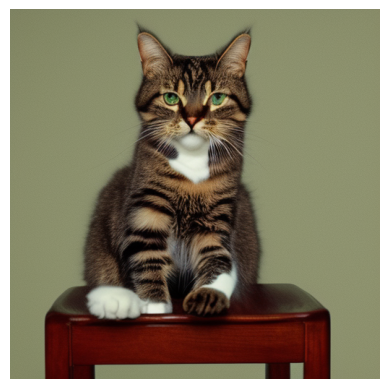

c:\Users\Deniz\.conda\envs\ds310\lib\site-packages\transformers\generation\utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Iteration 2:
Prompt: cat chair.

Crow's eye is not only focused on looking for danger, it is focused on the very same moment he is looking for


  0%|          | 0/50 [00:00<?, ?it/s]

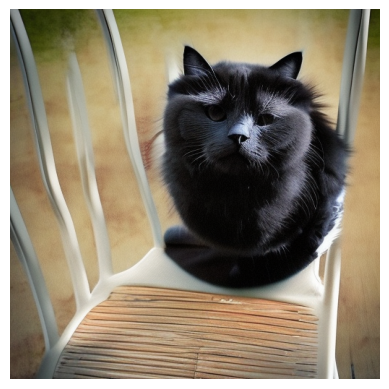

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Iteration 3:
Prompt: chair cat has to be adopted by a new owner - a big responsibility to take on for a new arrival to a new home. There is also the


  0%|          | 0/50 [00:00<?, ?it/s]

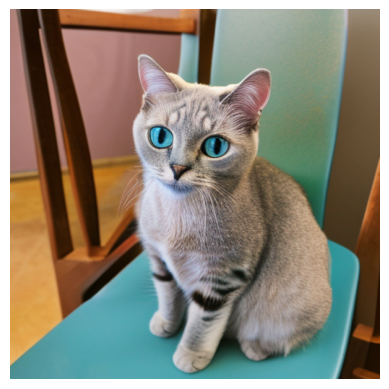

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Iteration 4:
Prompt: cat' --data="username=adm;password=secret;host=localuser;port=22" --output="brief.j


  0%|          | 0/50 [00:00<?, ?it/s]

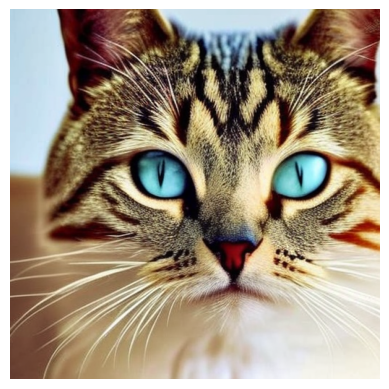

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Iteration 5:
Prompt: cat.


"There's definitely something going on, but I cannot see anything.


"There's nothing that looks like a human being


  0%|          | 0/50 [00:00<?, ?it/s]

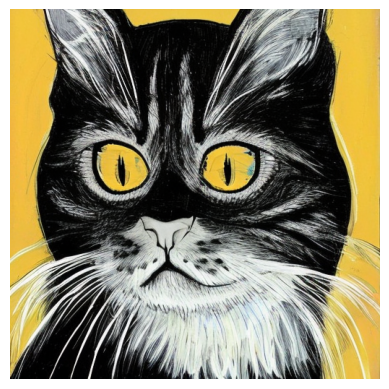

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.


In [4]:
# Play the game with an initial prompt and 5 iterations
final_prompt = play_game('A cat sitting on a chair', 5)